# Module 2: Data Acquisition, Cleaning & Exploratory Data Analysis (EDA)
### Week 3-4


## Learning Outcomes
- Implement various data collection methodologies (web scraping, API integration).
- Assess, clean, and validate real-world datasets.
- Handle missing values, duplicates, and outliers.
- Generate descriptive statistics and visualizations.
- Identify patterns, relationships, and anomalies in data.


## 1. Data Collection Methods & Best Practices
We will cover:
- File-based data (CSV, JSON)
- Web scraping with BeautifulSoup
- Public APIs and JSON fetching


In [1]:
import pandas as pd
# Load CSV data
df_csv = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv')
df_csv.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
import requests

url = "https://api.coingecko.com/api/v3/simple/price"
params = {
    "ids": "bitcoin",
    "vs_currencies": "usd"
}

response = requests.get(url, params=params)
data = response.json()
print(data)

{'bitcoin': {'usd': 115713}}


In [5]:
from bs4 import BeautifulSoup
import requests

page = requests.get('https://quotes.toscrape.com/')
soup = BeautifulSoup(page.content, 'html.parser')
quotes = [q.text for q in soup.find_all('span', class_='text')]
quotes[:5]

['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”',
 '“It is our choices, Harry, that show what we truly are, far more than our abilities.”',
 '“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”',
 '“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”',
 "“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”"]

## 2. Data Cleaning
We will handle:
- Missing values
- Duplicates
- Outliers
- Data transformation and normalization


In [6]:
# Example with Titanic dataset
df = df_csv.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [7]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [8]:
# Impute missing Age with median
df['age'] = df['age'].fillna(df['age'].median())
# Drop rows where 'embarked' is missing
df = df.dropna(subset=['embarked'])
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [9]:
# Introduce a duplicate row artificially
df = pd.concat([df, df.iloc[[0]]])
print('Before:', df.shape)
df = df.drop_duplicates()
print('After:', df.shape)

Before: (890, 15)
After: (779, 15)


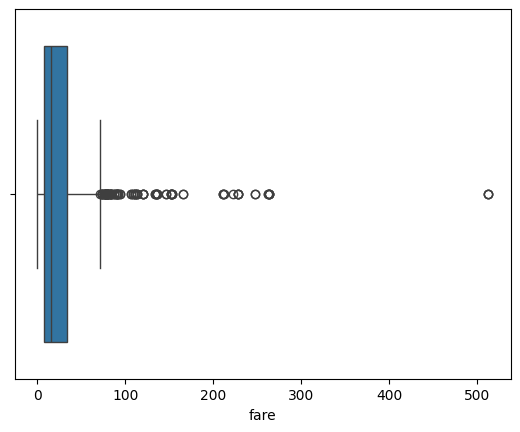

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['fare'])
plt.show()

## 3. Exploratory Data Analysis (EDA)
We will explore:
- Descriptive statistics
- Visualizations (Matplotlib, Seaborn, Plotly)
- Correlations
- Distribution analysis


In [ ]:
df.describe()

In [ ]:
sns.histplot(df['age'], bins=30, kde=True)
plt.show()

sns.scatterplot(x='age', y='fare', hue='sex', data=df)
plt.show()

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter(df, x='age', y='fare', color='sex', hover_data=['class'])
fig.show()

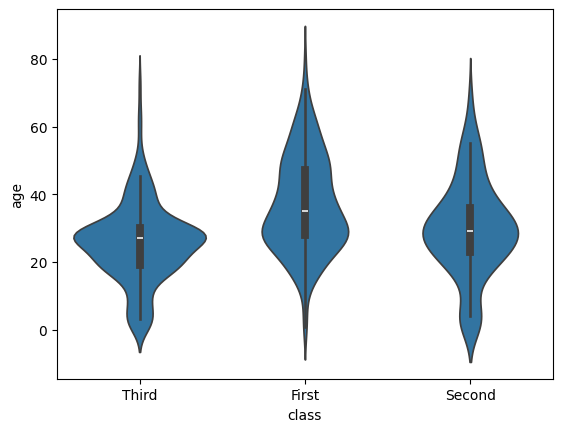

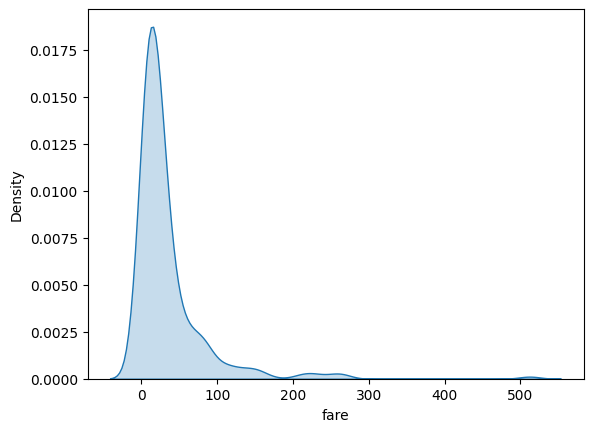

In [11]:
sns.violinplot(x='class', y='age', data=df)
plt.show()

sns.kdeplot(df['fare'], fill=True)
plt.show()

In [12]:
df.groupby('sex')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,291.0,27.801546,13.032566,0.75,19.0,28.0,35.0,63.0
male,488.0,30.625348,14.036734,0.42,22.0,28.0,37.0,80.0


In [13]:
import scipy.stats as stats

contingency = pd.crosstab(df['sex'], df['class'])
chi2, p, dof, ex = stats.chi2_contingency(contingency)
print('Chi-square test p-value:', p)
contingency

Chi-square test p-value: 0.002658195226508022


class,First,Second,Third
sex,,,
female,91,73,127
male,121,92,275


In [14]:
male_ages = df[df['sex']=='male']['age']
female_ages = df[df['sex']=='female']['age']
t_stat, p_val = stats.ttest_ind(male_ages, female_ages)
print('T-test p-value:', p_val)

T-test p-value: 0.005417882957783202


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])
df[['age','age_scaled']].head()

,age,age_scaled
0,22.0,-0.551738
1,38.0,0.614342
2,26.0,-0.260218
3,35.0,0.395702
4,35.0,0.395702


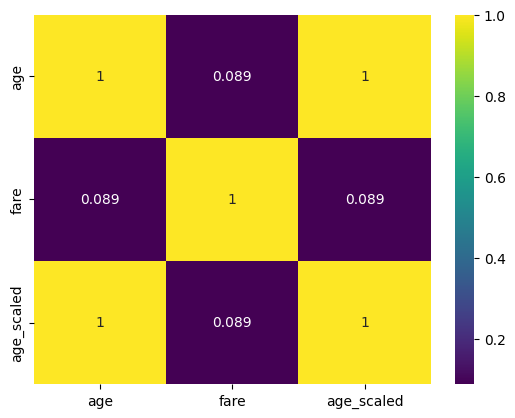

In [16]:
sns.heatmap(df[['age','fare','age_scaled']].corr(), annot=True, cmap='viridis')
plt.show()

### Feature Engineering
We can create new variables based on existing data. For example:
- Family size = sibsp + parch + 1
- Is child = age < 12


In [17]:
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_child'] = (df['age'] < 12).astype(int)
df[['age','sibsp','parch','family_size','is_child']].head()

,age,sibsp,parch,family_size,is_child
0,22.0,1,0,2,0
1,38.0,1,0,2,0
2,26.0,0,0,1,0
3,35.0,1,0,2,0
4,35.0,0,0,1,0


## 4. Mini Project / Assessment
- Fetch data from a public API
- Clean the dataset (missing values, duplicates, outliers)
- Perform EDA with summary stats and visualizations
- Submit a short report (group project, 10% weight)
